## Decision Trees on Balloons dataset

First, we import the necessary libraries:

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
%pylab inline

import numpy as np
import pylab as pl
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Solution 1

 This dataset describes various experiments done with balloons and by identifying some features of it we can predict that if the balloon is inflated or not which I think is very interesting.

Number of attributes: 4

Number of Instances: 20

Attribute Information: (Classes Inflated T or F)
 -  Color             yellow, purple
 -  size              large, small
 -  act               stretch, dip
 -  age               adult, child
 -  inflated          T, F

In [35]:
# Load data
fileURL = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/balloons/adult-stretch.data'
name = ['color', 'size', 'act', 'age', 'inflated']
data = pd.read_csv(fileURL, names=name, header=None)
data

,color,size,act,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,SMALL,DIP,CHILD,F
5,YELLOW,LARGE,STRETCH,ADULT,T
6,YELLOW,LARGE,STRETCH,CHILD,T
7,YELLOW,LARGE,DIP,ADULT,T
8,YELLOW,LARGE,DIP,CHILD,F
9,YELLOW,LARGE,DIP,CHILD,F


# Solution 2

The dataset does not have missing values. All of its 4 features are categorical in nature. Below is some statistics regarding the dataset which might be insightful.

In [19]:
data.describe().transpose()

,count,unique,top,freq
color,20,2,YELLOW,10
size,20,2,SMALL,10
act,20,2,DIP,12
age,20,2,CHILD,12
inflated,20,2,T,12


Some good data visualizations will be plotting the data in pie charts. We do it for all the features. For that we construct a generic function.

In [78]:
def plot_feature(feature, label):
    
    df = data.groupby(feature).size()
    
    #Plot
    # make a square figure and axes
    figure(1, figsize=(6,6))
    
    # The slices will be ordered and plotted counter-clockwise.
    fracs = [df.values[0], df.values[1]]
    
    pie(fracs, labels=label, autopct='%.1f%%')
    
    show()
    
    return


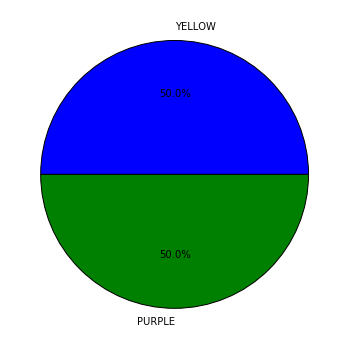

In [79]:
plot_feature('color', ['YELLOW', 'PURPLE'])

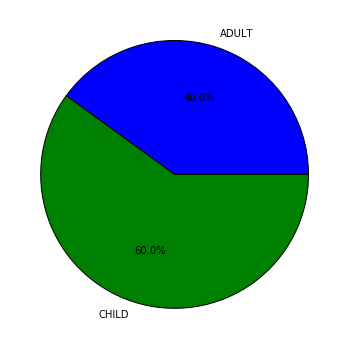

In [80]:
plot_feature('age', ['ADULT', 'CHILD'])

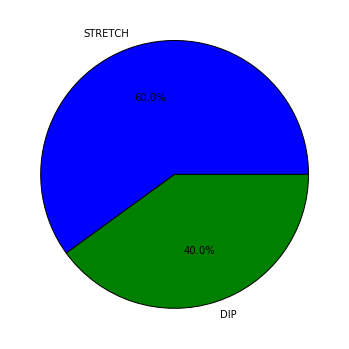

In [81]:
plot_feature('act', ['STRETCH', 'DIP'])

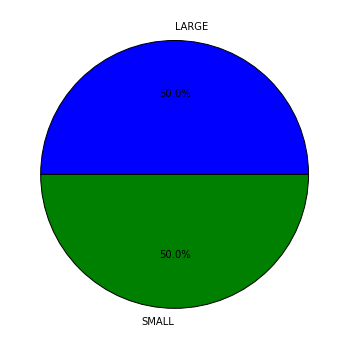

In [82]:
plot_feature('size', ['LARGE', 'SMALL'])

# Solution 3

Next we replace all the categorical data with numeric values for training.

In [36]:
data[data == 'LARGE'] = 1
data[data == 'DIP'] = 1
data[data == 'ADULT'] = 1
data[data == 'PURPLE'] = 1
data[data == 'T'] = 1
data[data != 1] = 0

In [37]:
data

,color,size,act,age,inflated
0,0,0,0,1,1
1,0,0,0,0,1
2,0,0,1,1,1
3,0,0,1,0,0
4,0,0,1,0,0
5,0,1,0,1,1
6,0,1,0,0,1
7,0,1,1,1,1
8,0,1,1,0,0
9,0,1,1,0,0


Now we train the classifier using the scikit-learn DecisionTreeClassifier. I use sampling to choose the training set with a sample size of 10 instances out of 20 instances from the dataset.

In [38]:
sampler = np.random.randint(0, len(data), size=10)
data = data.take(sampler)

In [39]:
data

,color,size,act,age,inflated
5,0,1,0,1,1
9,0,1,1,0,0
7,0,1,1,1,1
17,1,1,1,1,1
3,0,0,1,0,0
0,0,0,0,1,1
1,0,0,0,0,1
7,0,1,1,1,1
4,0,0,1,0,0
16,1,1,0,0,1


In [60]:
train_target = data['inflated'].tolist()

In [46]:
train_data = np.asarray(data.drop('inflated', axis=1))

In [48]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_target)

# Solution 4

Next after the classifier has been trained I export the decision tree using GraphViz tool.

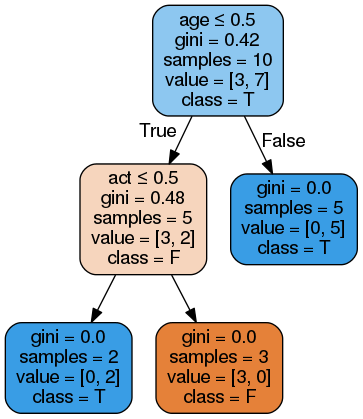

In [64]:
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=data.columns[:4].tolist(),
                                class_names=['F', 'T'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

# Solution 5:

Based on the above decision tree now I predict the class of a test dataset and see the result. I create the test instance test_data such that it is already having the numeric value of the features and then try to predict it using the generated decision tree classifier.

In [67]:
# test-instance {PURPLE, SMALL, DIP, CHILD}
test_data = [0, 0, 1, 0]
clf.predict([test_data])

array([0])

At first age is 0(CHILD) so it is true and chooses the left node. Next act is 1(DIP) so it is False and chooses the right node from there. Finally it reaches the leaf node which classifies it as inflated = 'F' or 0.

As far as this prediction is concerned I am happy with it because it predicted correctly. From the initial data values we can see that this test instance corresponds to row 13 and this row was not used in the training of the classifier since it was discarded due to sampling. (please see above values)

But this classifier may fail in scenarios where we have to tweek some of its parameters to fine tune it.